# Project 1 - For AWS ML Nanodegree Program
## AWS Machine Learning Engineer Nanodegree
## Step 1: Install Libraries

In [8]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install kaggle
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.1.0
    Uninstalling setuptools-80.1.0:
      Successfully uninstalled setuptools-80.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.18.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-table==5.0.0, which is not installed.
dash 2.18.1 requires Flask<3.1,>=1.0.4, but you have flask 3.1.0 which is incompatible.
dash 2.18.1 requires Werkzeug<3.1, but you have werkzeug 

## Step 2: Download and Visualize Kaggle Data

In [2]:
username = "teweboteshome"
key = "022c5daa00b941e214b08e59729ff5c9"

In [9]:
import json
import os

# Create the .kaggle directory in the user's home directory
!mkdir -p ~/.kaggle

# Create the kaggle.json file
!touch ~/.kaggle/kaggle.json

# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
kaggle_json_path

# Save API token the kaggle.json file
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": username, "key": key}))

In [10]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 628MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [12]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [16]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [17]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

In [18]:
train = train.drop(columns=['casual', 'registered'])

In [19]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [20]:
predictor = TabularPredictor(label="count").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250527_171027"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.85 GB / 3.76 GB (49.1%)
Disk Space Avail:   4.90 GB / 4.99 GB (98.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

(_ray_fit pid=1018) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=1116) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=1152) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=1152) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=1152) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=1152) [6000]	valid_set's rmse: 125.468 [repeated 6x across cluster]
(_ray_fit pid=1186) [8000]	valid_set's rmse: 132.379 [repeated 8x across cluster]
(_ray_fit pid=1226) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=1262) [2000]	valid_set's rmse: 138.865 [repeated 6x across cluster]


(_dystack pid=883) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=883) 	57.66s	 = Training   runtime
(_dystack pid=883) 	12.82s	 = Validation runtime
(_dystack pid=883) Fitting model: LightGBM_BAG_L1 ... Training model for up to 27.56s of the 75.37s of remaining time.
(_dystack pid=883) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.58%)


(_ray_fit pid=1310) [1000]	valid_set's rmse: 129.285 [repeated 7x across cluster]
(_ray_fit pid=1379) [1000]	valid_set's rmse: 135.098 [repeated 2x across cluster]
(_ray_fit pid=1450) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=1483) [1000]	valid_set's rmse: 134.058


(_dystack pid=883) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_dystack pid=883) I0000 00:00:1748365928.363705     924 chttp2_transport.cc:1182] ipv4:169.255.255.2:43219: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-05-27T17:12:08.362542923+00:00", http2_error:2, grpc_status:14}


(_ray_fit pid=1553) [1000]	valid_set's rmse: 136.511 [repeated 2x across cluster]


(_dystack pid=883) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=883) 	26.66s	 = Training   runtime
(_dystack pid=883) 	1.06s	 = Validation runtime
(_dystack pid=883) Fitting model: WeightedEnsemble_L2 ... Training model for up to 143.40s of the 45.02s of remaining time.
(_dystack pid=883) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=883) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=883) 	0.03s	 = Training   runtime
(_dystack pid=883) 	0.0s	 = Validation runtime
(_dystack pid=883) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=883) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 44.98s of the 44.95s of remaining time.
(_dystack pid=883) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.68%)


(_ray_fit pid=1589) [1000]	valid_set's rmse: 68.8067
(_ray_fit pid=1590) [1000]	valid_set's rmse: 69.9415
(_ray_fit pid=1657) [1000]	valid_set's rmse: 78.2341
(_ray_fit pid=1688) [1000]	valid_set's rmse: 72.9773
(_ray_fit pid=1731) [1000]	valid_set's rmse: 75.8581
(_ray_fit pid=1764) [1000]	valid_set's rmse: 76.948
(_ray_fit pid=1798) [1000]	valid_set's rmse: 71.9787
(_ray_fit pid=1829) [1000]	valid_set's rmse: 75.9102
(_ray_fit pid=1829) [2000]	valid_set's rmse: 75.2777


(_dystack pid=883) 	-73.6831	 = Validation score   (-root_mean_squared_error)
(_dystack pid=883) 	32.93s	 = Training   runtime
(_dystack pid=883) 	1.95s	 = Validation runtime
(_dystack pid=883) Fitting model: LightGBM_BAG_L2 ... Training model for up to 8.13s of the 8.10s of remaining time.
(_dystack pid=883) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.68%)
(_dystack pid=883) I0000 00:00:1748365984.894721     923 chttp2_transport.cc:1182] ipv4:169.255.255.2:33297: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2025-05-27T17:13:04.894717604+00:00"}
(_dystack pid=883) I0000 00:00:1748365984.895040     924 chttp2_transport.cc:1182] ipv4:169.255.255.2:44741: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-05-27T17:13:04.895035554+00:00", http2_err

In [21]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.064631  root_mean_squared_error      26.102581  416.398453                0.000810           0.085700            3       True         13
1   RandomForestMSE_BAG_L2  -53.434873  root_mean_squared_error      18.634301  326.058326                1.682470          44.850183            2       True         12
2          LightGBM_BAG_L2  -54.952029  root_mean_squared_error      17.319871  306.674777                0.368040          25.466634            2       True         11
3        LightGBMXT_BAG_L2  -60.284799  root_mean_squared_error      24.051261  345.995935                7.099430          64.787792            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.048974    0.032943   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.7586524651168,

In [22]:
performance = predictor.evaluate(train)

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the saf

In [23]:
performance

{'root_mean_squared_error': -77.560242558177,
 'mean_squared_error': -6015.591225683249,
 'mean_absolute_error': -52.62763457119345,
 'r2': 0.8166553974151611,
 'pearsonr': 0.9391998135107124,
 'median_absolute_error': -30.72541642189026}

### Create predictions from test data

In [24]:
predictions = predictor.predict(test)

/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

<Axes: xlabel='model'>

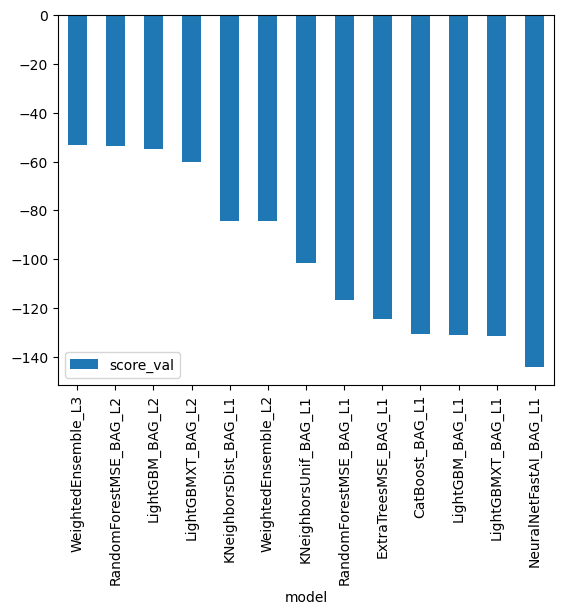

In [25]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [26]:
predictions.describe()

count    6493.000000
mean      100.813683
std        89.977707
min         2.824473
25%        20.233366
50%        63.861332
75%       168.513992
max       368.499695
Name: count, dtype: float64

In [27]:
predictions = [x if x > 0 else 0 for x in predictions]

In [28]:
submission["count"] = predictions

In [29]:
submission.to_csv("submission.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 243k/243k [00:00<00:00, 875kB/s]
Successfully submitted to Bike Sharing Demand

## Step 4: Exploratory Data Analysis and Creating an additional feature

In [31]:
import matplotlib.pyplot as plt

In [32]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

<Axes: >

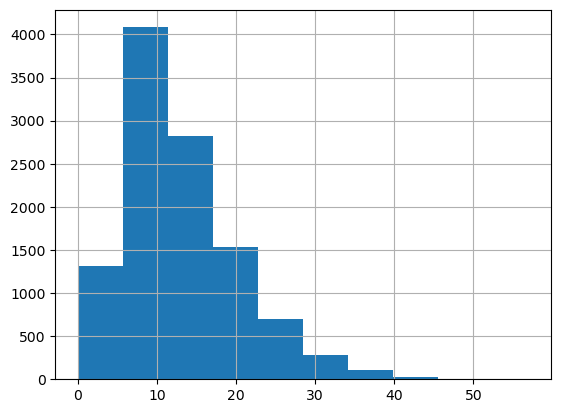

In [38]:
train.windspeed.hist()

<Axes: >

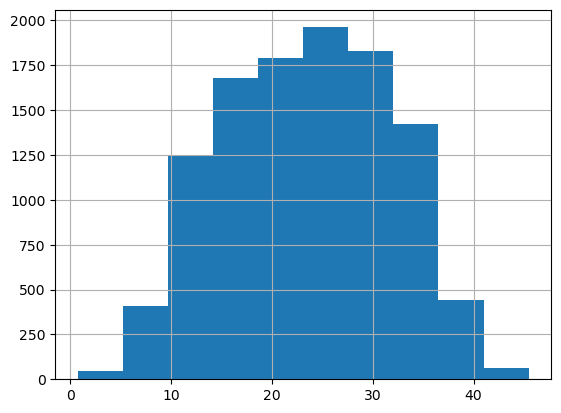

In [37]:
train.atemp.hist()

<Axes: >

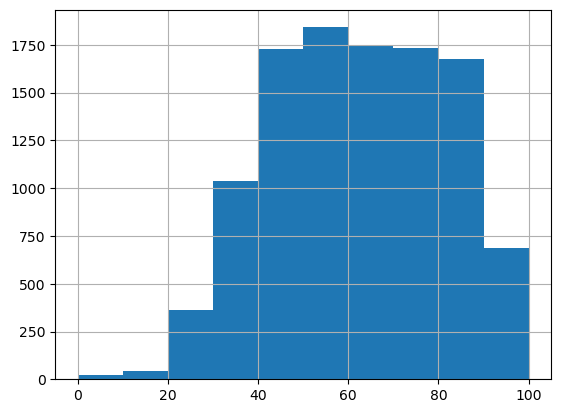

In [36]:
train.humidity.hist()

<Axes: >

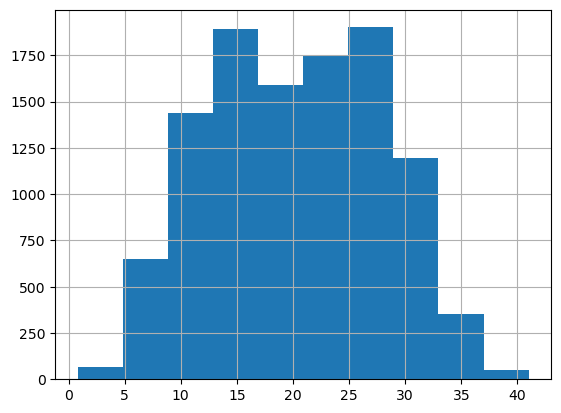

In [35]:
train.temp.hist()

<Axes: >

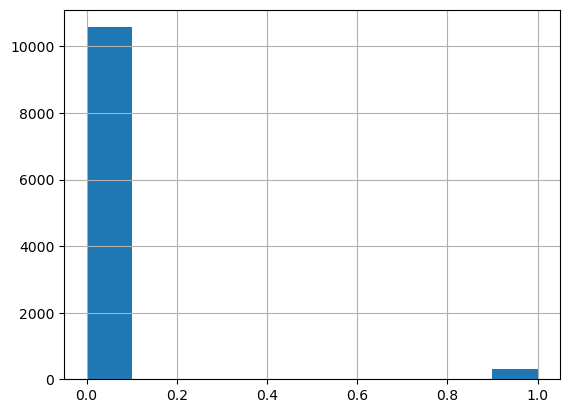

In [34]:
train.holiday.hist()

<Axes: >

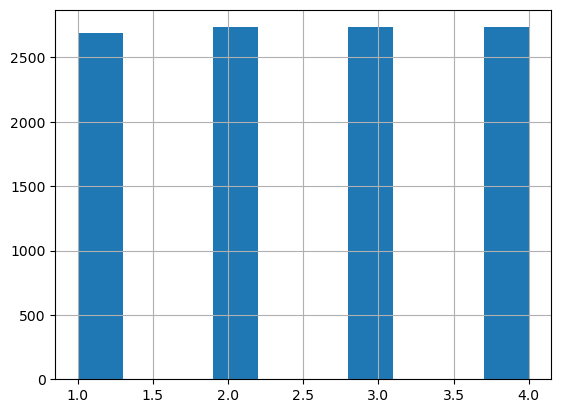

In [33]:
train.season.hist()

In [39]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [40]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [41]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

In [42]:
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [43]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


## Rerun the model with some additional data

In [44]:
predictor_new_features = TabularPredictor(label="count").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250527_173134"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.62 GB / 3.76 GB (43.2%)
Disk Space Avail:   3.91 GB / 4.99 GB (78.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

In [45]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.287729  root_mean_squared_error      28.810156  396.509290                0.000886           0.047901            3       True         13
1          LightGBM_BAG_L2  -30.497015  root_mean_squared_error      26.682689  290.968144                0.355991          25.702232            2       True         10
2        LightGBMXT_BAG_L2  -31.088046  root_mean_squared_error      27.232156  293.872055                0.905457          28.606143            2       True          9
3          CatBoost_BAG_L2  -31.177081  root_mean_squared_error      26.487105  301.338176                0.160406          36.072265            2       True         12
4   RandomForestMSE_BAG_L2  -31.689660  root_mean_squared_error      27.387415  306.080749   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -34.832862499083234,
  'ExtraTre

In [47]:
performance = predictor_new_features.evaluate(train)

In [71]:
performance

{'root_mean_squared_error': -15.622133537250898,
 'mean_squared_error': -244.05105625569925,
 'mean_absolute_error': -9.904288931397115,
 'r2': 0.9925617575645447,
 'pearsonr': 0.9967150469380277,
 'median_absolute_error': -6.087165832519531}

<Axes: xlabel='model'>

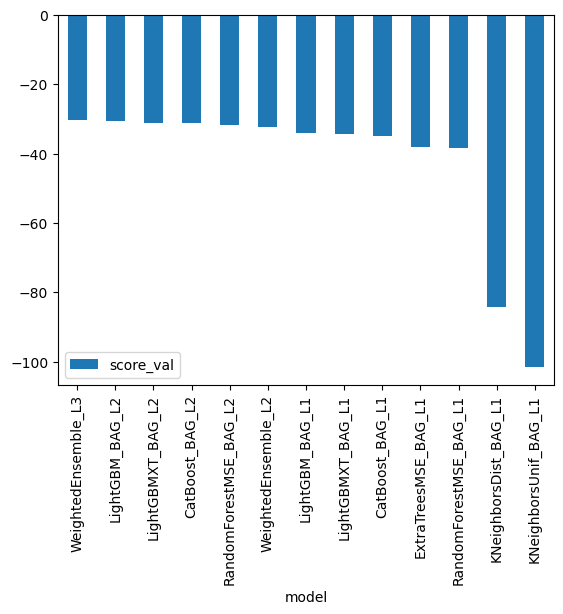

In [48]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [49]:
predictions_new_fet = predictor_new_features.predict(test)

In [50]:
predictions_new_fet.describe()

count    6493.000000
mean      162.152283
std       143.375031
min         2.502689
25%        49.366631
50%       124.816910
75%       231.484894
max       816.902954
Name: count, dtype: float64

In [51]:
predictions_new_fet = [x if x > 0 else 0 for x in predictions_new_fet]

In [52]:
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features["count"] = predictions_new_fet

In [53]:
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 243k/243k [00:00<00:00, 1.01MB/s]
Successfully submitted to Bike Sharing Demand

In [55]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-27 17:56:04.210000  new features                       SubmissionStatus.COMPLETE  0.63043      0.63043       
submission.csv               2025-05-27 17:27:29.793000  first raw submission               SubmissionStatus.COMPLETE  1.79854      1.79854       
submission_new_hpo.csv       2025-05-25 19:13:47.703000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       
submission_new_features.csv  2025-05-25 18:32:44.883000  new features                       SubmissionStatus.COMPLETE  0.60985      0.60985       


## Change Hyperparameters

In [56]:
predictor_new_hpo = TabularPredictor(label='count').fit(
    train_data=train,
    hyperparameters={
        'RF': {'n_estimators': 300, 'max_depth': 15},
        'XGB': {'learning_rate': 0.05, 'max_depth': 8},
        'CAT': {'iterations': 1000, 'learning_rate': 0.03},
        'NN_TORCH': {'num_epochs': 20},
    }
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250527_180056"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.57 GB / 3.76 GB (41.7%)
Disk Space Avail:   2.92 GB / 4.99 GB (58.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'        

In [57]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -34.516079  root_mean_squared_error       0.342272  55.582648                0.000438           0.012298            2       True          5
1              XGBoost -35.266885  root_mean_squared_error       0.102477   7.915687                0.102477           7.915687            1       True          3
2         RandomForest -39.033930  root_mean_squared_error       0.221525  15.527600                0.221525          15.527600            1       True          1
3             CatBoost -39.290401  root_mean_squared_error       0.004974  13.757182                0.004974          13.757182            1       True          2
4       NeuralNetTorch -56.947295  root_mean_squared_error       0.012859  18.369881                0.012859          18.36

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest': -39.03392978800655,
  'CatBoost': -39.29040118404546,
  'XGBoost': -35.26688527735163,
  'NeuralNetTorch': -56.94729494922701,
  'WeightedEnsemble_L2': -34.51607895628616},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest': ['RandomForest'],
  'CatBoost': ['CatBoost'],
  'XGBoost': ['XGBoost'],
  'NeuralNetTorch': ['NeuralNetTorch'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'RandomForest': 15.527599573135376,
  'CatBoost': 13.757181882858276,
  'XGBoost': 7.91568660736084,
  'NeuralNetTorch': 18.36988115310669,
  'WeightedEnsemble_L2': 0.012298345565795898},
 'model_pred_times': {'RandomForest': 0.22152471542358398,
  'CatBoost': 0.004973888397216797,
  'XGBoost': 0.10247683525085449,
  'NeuralNe

In [59]:
performance_hyp = predictor_new_hpo.evaluate(train)

In [60]:
performance_hyp

{'root_mean_squared_error': -17.989907601721317,
 'mean_squared_error': -323.6367755184705,
 'mean_absolute_error': -11.126336251000353,
 'r2': 0.9901361465454102,
 'pearsonr': 0.9951716610951991,
 'median_absolute_error': -6.512447357177734}

In [61]:
predictions_hyp = predictor_new_hpo.predict(test)
predictions_hyp.describe()

count    6493.000000
mean      193.365860
std       172.646164
min       -11.488589
25%        47.681801
50%       153.872665
75%       287.323944
max       883.268311
Name: count, dtype: float64

In [62]:
predictions_hyp = [x if x > 0 else 0 for x in predictions_hyp]

In [68]:
min(predictions_hyp)

0

In [69]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')

submission_new_hpo["count"] = predictions_hyp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 872kB/s]
Successfully submitted to Bike Sharing Demand

In [70]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-27 18:12:07.387000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       
submission_new_features.csv  2025-05-27 17:56:04.210000  new features                       SubmissionStatus.COMPLETE  0.63043      0.63043       
submission.csv               2025-05-27 17:27:29.793000  first raw submission               SubmissionStatus.COMPLETE  1.79854      1.79854       
submission_new_hpo.csv       2025-05-25 19:13:47.703000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51037      0.51037       


### ~~~~~~~~~~~~ END ~~~~~~~~~~~~~~~~~~~

In [93]:
dic = {'model': ['initial', 'add_features_model', 'HPO'], 
    'result':[0.8166, 0.99256, 0.99013]}

In [94]:
dd = pd.DataFrame(dic)

In [111]:
dd.kaggle = [1.79854, 0.63043, 0.51037]

/tmp/ipykernel_239/3474598523.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dd.kaggle = [1.79854, 0.63043, 0.51037]


In [107]:
import matplotlib.pyplot as plt

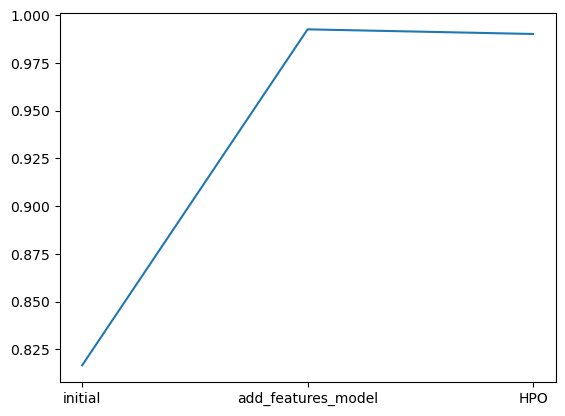

In [110]:
plt.plot(dd.model, dd.result)
plt.show()

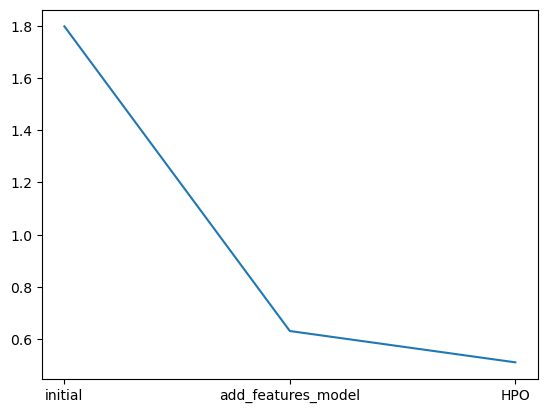

In [113]:
plt.plot(dd.model, dd.kaggle)
plt.show()